In [68]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [69]:
N = 51
shape = (N, N)
shi = np.zeros(shape)
shi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
shi[0:,] = 80 #top boundary 
shi[-1:,] = 30  #bottom boundary 
shi[:,0] = 20   #left boundary
shi[:,-1] = 35  #right boundary

In [74]:
iterations = 0
while(iterations < 1000):
    for i in range(1, N-1):
        for j in range(1, N-1):
            shi[i][j] = (shi[i+1][j] + shi[i-1][j] + shi[i][j+1] + shi[i][j-1])/4
    iterations += 1;
shi

array([[20.        , 80.        , 80.        , ..., 80.        ,
        80.        , 35.        ],
       [20.        , 49.98996937, 61.83900452, ..., 66.34701377,
        57.47635403, 35.        ],
       [20.        , 38.12078968, 49.95971158, ..., 57.40534097,
        48.55836445, 35.        ],
       ...,
       [20.        , 23.09016033, 25.13311384, ..., 32.57888823,
        33.5278109 , 35.        ],
       [20.        , 25.03329773, 27.04299237, ..., 31.55107768,
        32.51972215, 35.        ],
       [20.        , 30.        , 30.        , ..., 30.        ,
        30.        , 35.        ]])

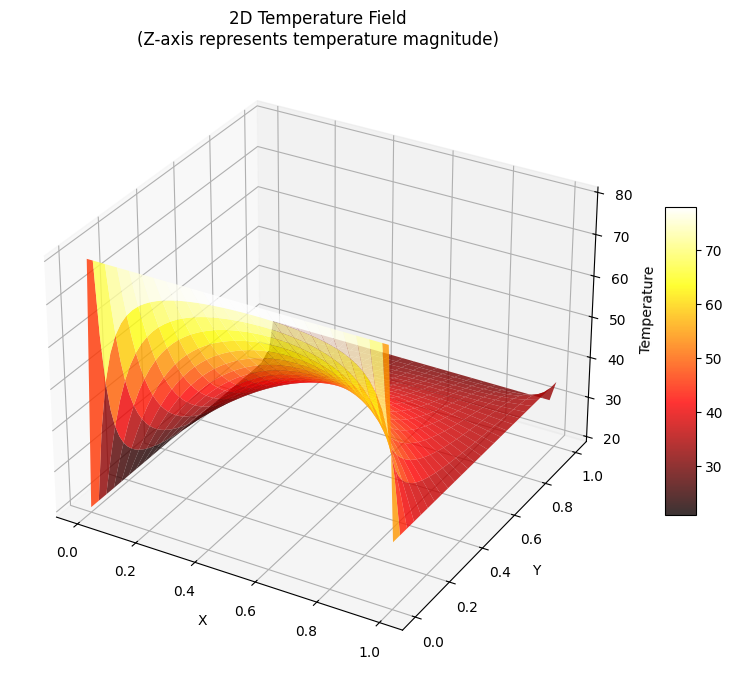

In [81]:
X1 = np.linspace(0, 1, N)  
Y1 = np.linspace(0, 1, N)
X, Y = np.meshgrid(X1, Y1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, shi, cmap='hot', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Temperature')
ax.set_title('2D Temperature Field\n(Z-axis represents temperature magnitude)')
if 'surf' in locals():
    fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

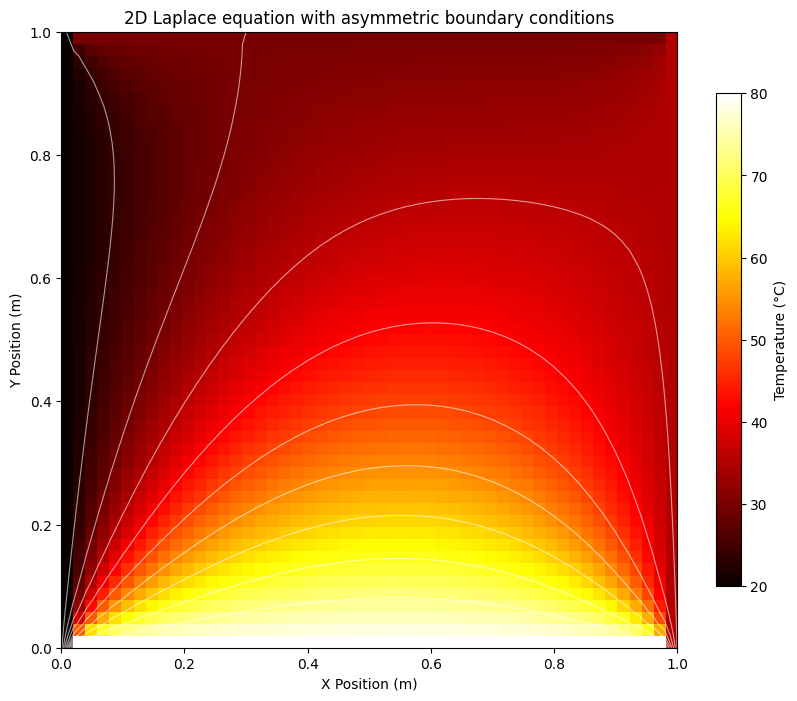

In [82]:
plt.figure(figsize=(10, 8))
plt.imshow(shi, extent=[0,1,0,1], origin='lower', cmap='hot', aspect='equal')
plt.colorbar(label='Temperature (°C)', shrink=0.8)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('2D Laplace equation with asymmetric boundary conditions')

# Add contour lines to show isotherms
plt.contour(X, Y, shi, levels=10, colors='white', linewidths=0.8, alpha=0.6)
plt.show()